## Yelp Project Part III: Model Training & Optimization

### Model training

In [8]:
import pandas as pd
df=pd.read_csv('restaurant_final_3.csv')

In [9]:
df=df.drop(['business_id'],axis=1)

In [10]:
df['Topic1'].unique()

array([-0.38461538,  1.        , -0.33333333, ...,  0.63793103,
        0.32876712,  0.35384615])

In [11]:
df.shape

(55457, 66)

In [12]:
y=df['stars'].values
X=df.drop(['stars'],axis=1).values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=1)


In [14]:
X_train.shape

(38819, 65)

In [9]:
# find the best component numbers using LR
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA

clf = LogisticRegression()
for component in range(5, X_train.shape[1]):
    pca = PCA(n_components = component)
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('pca', pca),
                   ('clf', clf)
                     ])
   
    scores = cross_val_score(pipe, X_train, y_train, cv=5, n_jobs = -1)
    print("component: {0:<20d} and Score: {1:0.4f}".format(component, np.mean(scores)))
    
#     pipe.fit(X_train, y_train)
#     score = pipe.score(X_test, y_test)  
#     print("Component: {0:<20d} and Score: {1:0.4f}".format(component, score))

component: 5                    and Score: 0.7055
component: 6                    and Score: 0.7451
component: 7                    and Score: 0.7452
component: 8                    and Score: 0.7454
component: 9                    and Score: 0.7492
component: 10                   and Score: 0.7483
component: 11                   and Score: 0.7492
component: 12                   and Score: 0.7493
component: 13                   and Score: 0.7490
component: 14                   and Score: 0.7493
component: 15                   and Score: 0.7487
component: 16                   and Score: 0.7496
component: 17                   and Score: 0.7490
component: 18                   and Score: 0.7496
component: 19                   and Score: 0.7483
component: 20                   and Score: 0.7488
component: 21                   and Score: 0.7490
component: 22                   and Score: 0.7493
component: 23                   and Score: 0.7501
component: 24                   and Score: 0.7506


In [10]:
# find the best component numbers using LinearSVC
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA

clf = LinearSVC(C=1, dual=False)
for component in range(5, X_train.shape[1]):
    pca = PCA(n_components = component)
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('pca', pca),
                   ('clf', clf)
                     ])
   
    scores = cross_val_score(pipe, X_train, y_train, cv=5, n_jobs = -1)
    print("component: {0:<20d} and Score: {1:0.4f}".format(component, np.mean(scores)))
    
#     pipe.fit(X_train, y_train)
#     score = pipe.score(X_test, y_test)  
#     print("Component: {0:<20d} and Score: {1:0.4f}".format(component, score))

component: 5                    and Score: 0.7060
component: 6                    and Score: 0.7446
component: 7                    and Score: 0.7441
component: 8                    and Score: 0.7451
component: 9                    and Score: 0.7490
component: 10                   and Score: 0.7491
component: 11                   and Score: 0.7491
component: 12                   and Score: 0.7491
component: 13                   and Score: 0.7493
component: 14                   and Score: 0.7488
component: 15                   and Score: 0.7500
component: 16                   and Score: 0.7496
component: 17                   and Score: 0.7495
component: 18                   and Score: 0.7500
component: 19                   and Score: 0.7493
component: 20                   and Score: 0.7497
component: 21                   and Score: 0.7498
component: 22                   and Score: 0.7493
component: 23                   and Score: 0.7496
component: 24                   and Score: 0.7493


In [11]:
# find the best component numbers using RandomForest
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA

clf = RandomForestClassifier(max_depth=10, n_estimators=200, max_features='auto', n_jobs=-1)
for component in range(5, X_train.shape[1]):
    pca = PCA(n_components = component)
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('pca', pca),
                   ('clf', clf)
                     ])
   
    scores = cross_val_score(pipe, X_train, y_train, cv=5, n_jobs = -1)
    print("component: {0:<20d} and Score: {1:0.4f}".format(component, np.mean(scores)))
    
#     pipe.fit(X_train, y_train)
#     score = pipe.score(X_test, y_test)  
#     print("Component: {0:<20d} and Score: {1:0.4f}".format(component, score))

component: 5                    and Score: 0.7235
component: 6                    and Score: 0.7469
component: 7                    and Score: 0.7488
component: 8                    and Score: 0.7476
component: 9                    and Score: 0.7517
component: 10                   and Score: 0.7518
component: 11                   and Score: 0.7508
component: 12                   and Score: 0.7507
component: 13                   and Score: 0.7509
component: 14                   and Score: 0.7515
component: 15                   and Score: 0.7496
component: 16                   and Score: 0.7514
component: 17                   and Score: 0.7505
component: 18                   and Score: 0.7505
component: 19                   and Score: 0.7504
component: 20                   and Score: 0.7510
component: 21                   and Score: 0.7495
component: 22                   and Score: 0.7505
component: 23                   and Score: 0.7496
component: 24                   and Score: 0.7495


In [12]:
# find the best component numbers using Neural Net
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA

clf = MLPClassifier(hidden_layer_sizes=(100,50), alpha=1)
for component in range(5, X_train.shape[1]):
    pca = PCA(n_components = component)
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('pca', pca),
                   ('clf', clf)
                     ])
   
    scores = cross_val_score(pipe, X_train, y_train, cv=5, n_jobs = -1)
    print("component: {0:<20d} and Score: {1:0.4f}".format(component, np.mean(scores)))
    
#     pipe.fit(X_train, y_train)
#     score = pipe.score(X_test, y_test)  
#     print("Component: {0:<20d} and Score: {1:0.4f}".format(component, score))

component: 5                    and Score: 0.7262
component: 6                    and Score: 0.7503
component: 7                    and Score: 0.7519
component: 8                    and Score: 0.7517
component: 9                    and Score: 0.7547
component: 10                   and Score: 0.7544
component: 11                   and Score: 0.7536
component: 12                   and Score: 0.7550
component: 13                   and Score: 0.7553
component: 14                   and Score: 0.7576
component: 15                   and Score: 0.7552
component: 16                   and Score: 0.7552
component: 17                   and Score: 0.7563
component: 18                   and Score: 0.7547
component: 19                   and Score: 0.7561
component: 20                   and Score: 0.7564
component: 21                   and Score: 0.7549
component: 22                   and Score: 0.7558
component: 23                   and Score: 0.7570
component: 24                   and Score: 0.7572


In [11]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

names = [
#          "Perceptron",
         "LogisticRegression",
         "Linear SVM", 
#          "Decision Tree", 
         "Random Forest", 
#          "RBF SVM",          
         "Neural Net", 
         "XGBoost",
#          "Naive Bayes",  
#          "Nearest Neighbors"
            ] 

classifiers = [ 
#     Perceptron(),
    LogisticRegression(),
    LinearSVC(C=1, dual=False),
#     DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=10, n_estimators=200, max_features=10, n_jobs=-1),
#     SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    XGBClassifier(max_depth=10, learning_rate=0.05, n_estimators=500, random_state=100, n_jobs=-1),
#     GaussianNB(),
#     KNeighborsClassifier(3)
                 ]



lda = LinearDiscriminantAnalysis() 
pca = PCA(55)


i = 0
pred = [None, None, None, None, None]
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('pca', pca),
                   ('clf', clf)
                     ])
    pipe.fit(X_train, y_train)
#     pred[i] = pipe.predict(X_test)
#     print(name, pipe.score(X_test, y_test))

    
#      score = pipe.score(X_test, y_test)
    scores = cross_val_score(pipe, X_train, y_train, cv=3)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, np.mean(scores)))

    

#    clf.fit(X_train, y_train)
#    score = clf.score(X_test, y_test)
#    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))
    i += 1

Algo: LogisticRegression   and Score: 0.7727
Algo: Linear SVM           and Score: 0.7719
Algo: Random Forest        and Score: 0.7589
Algo: Neural Net           and Score: 0.7767
Algo: XGBoost              and Score: 0.7685


In [12]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

names = [
#          "Perceptron",
         "LogisticRegression",
         "Linear SVM", 
#          "Decision Tree", 
         "Random Forest", 
#          "RBF SVM",          
         "Neural Net", 
         "XGBoost",
#          "Naive Bayes",  
#          "Nearest Neighbors"
            ] 

classifiers = [ 
#     Perceptron(),
    LogisticRegression(),
    LinearSVC(C=1, dual=False),
#     DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=10, n_estimators=200, max_features=10, n_jobs=-1),
#     SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    XGBClassifier(max_depth=10, learning_rate=0.05, n_estimators=500, random_state=100, n_jobs=-1),
#     GaussianNB(),
#     KNeighborsClassifier(3)
                 ]



lda = LinearDiscriminantAnalysis() 
pca = PCA(55)


i = 0
pred = [None, None, None, None, None]
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
#                    ('pca', pca),
                   ('clf', clf)
                     ])
    pipe.fit(X_train, y_train)
#     pred[i] = pipe.predict(X_test)
#     print(name, pipe.score(X_test, y_test))

    
#     score = pipe.score(X_test, y_test)
    scores = cross_val_score(pipe, X_train, y_train, cv=3)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, np.mean(scores)))

    

#    clf.fit(X_train, y_train)
#    score = clf.score(X_test, y_test)
#    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))
    i += 1

Algo: LogisticRegression   and Score: 0.7723
Algo: Linear SVM           and Score: 0.7714
Algo: Random Forest        and Score: 0.7830
Algo: Neural Net           and Score: 0.7763
Algo: XGBoost              and Score: 0.7783


In [13]:
features = df.drop(['stars'],axis=1).columns
len(features)

65

training set:  0.8085216002473016
testing set:  0.7829065993508835


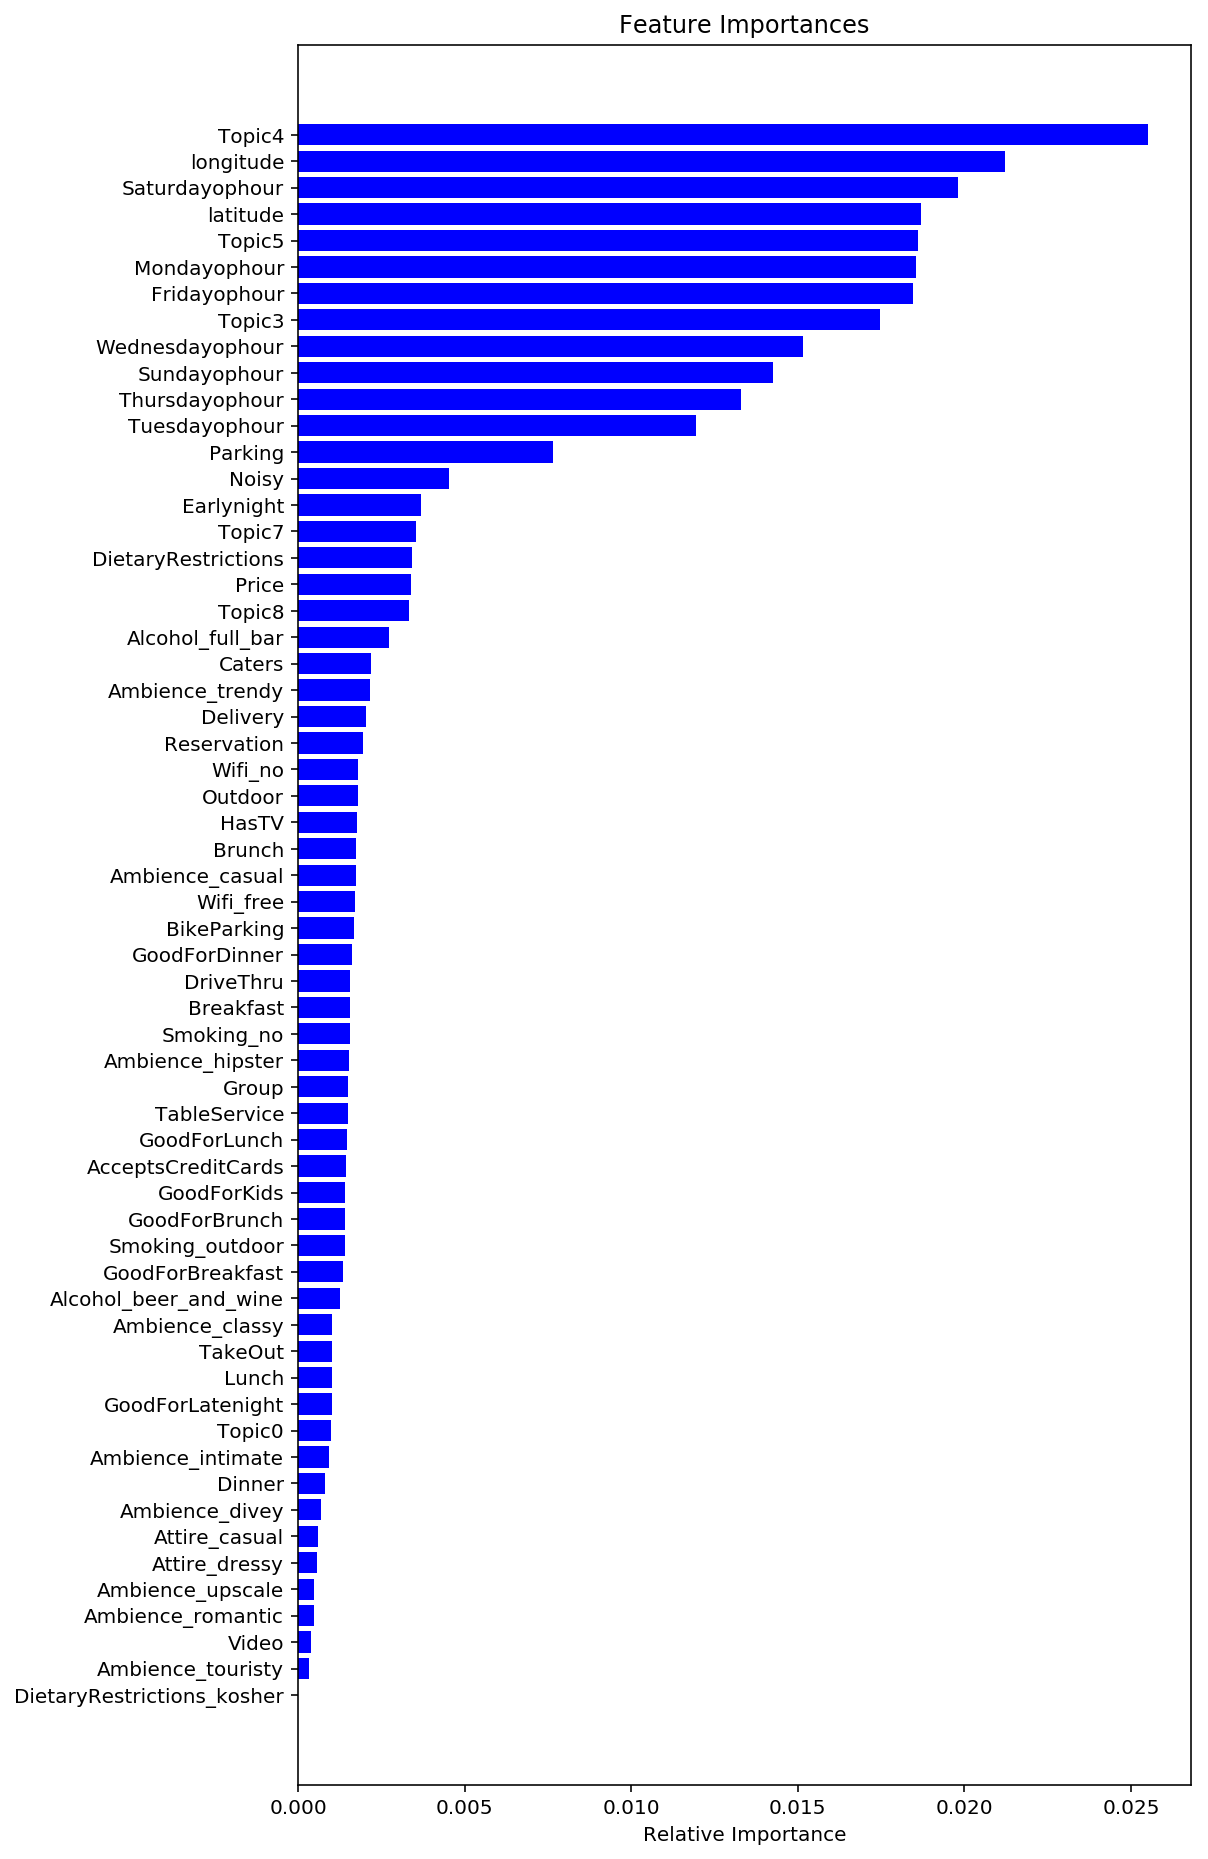

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=500, max_features=10)
rf.fit(X_train, y_train)

print('training set: ',rf.score(X_train, y_train))
print('testing set: ', rf.score(X_test, y_test))

importances = rf.feature_importances_
indices = np.argsort(importances)
indices = indices[:64]

plt.figure(figsize=(8,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

training set:  0.7862644581261753
testing set:  0.7886164202428176


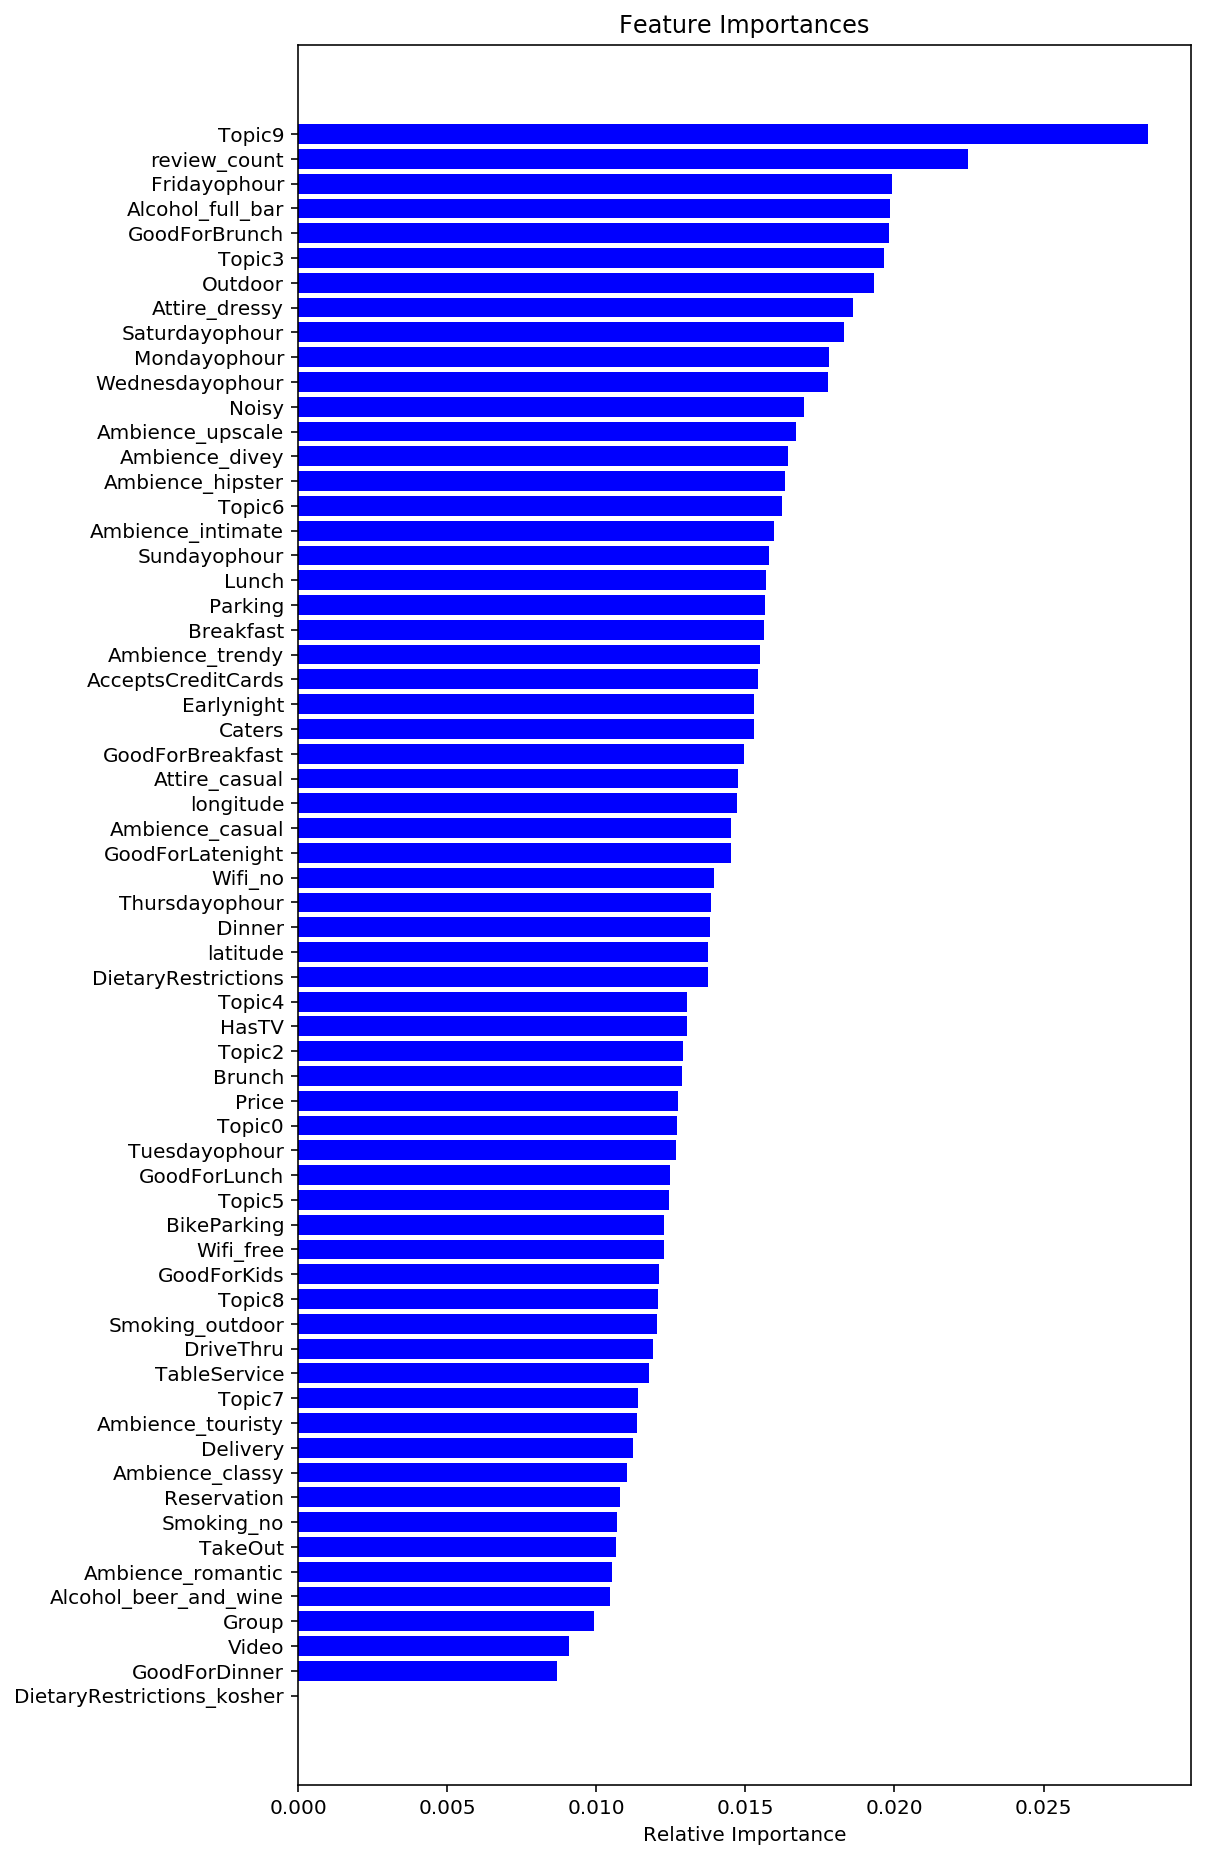

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.ensemble import RandomForestClassifier

rf = XGBClassifier(max_depth= 1, eta=0.001, gamma=0, n_estimators=1000, n_jobs=-1, subsample=0.1)
rf.fit(X_train, y_train)

print('training set: ',rf.score(X_train, y_train))
print('testing set: ', rf.score(X_test, y_test))

importances = rf.feature_importances_
indices = np.argsort(importances)
indices = indices[:65]

plt.figure(figsize=(8,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

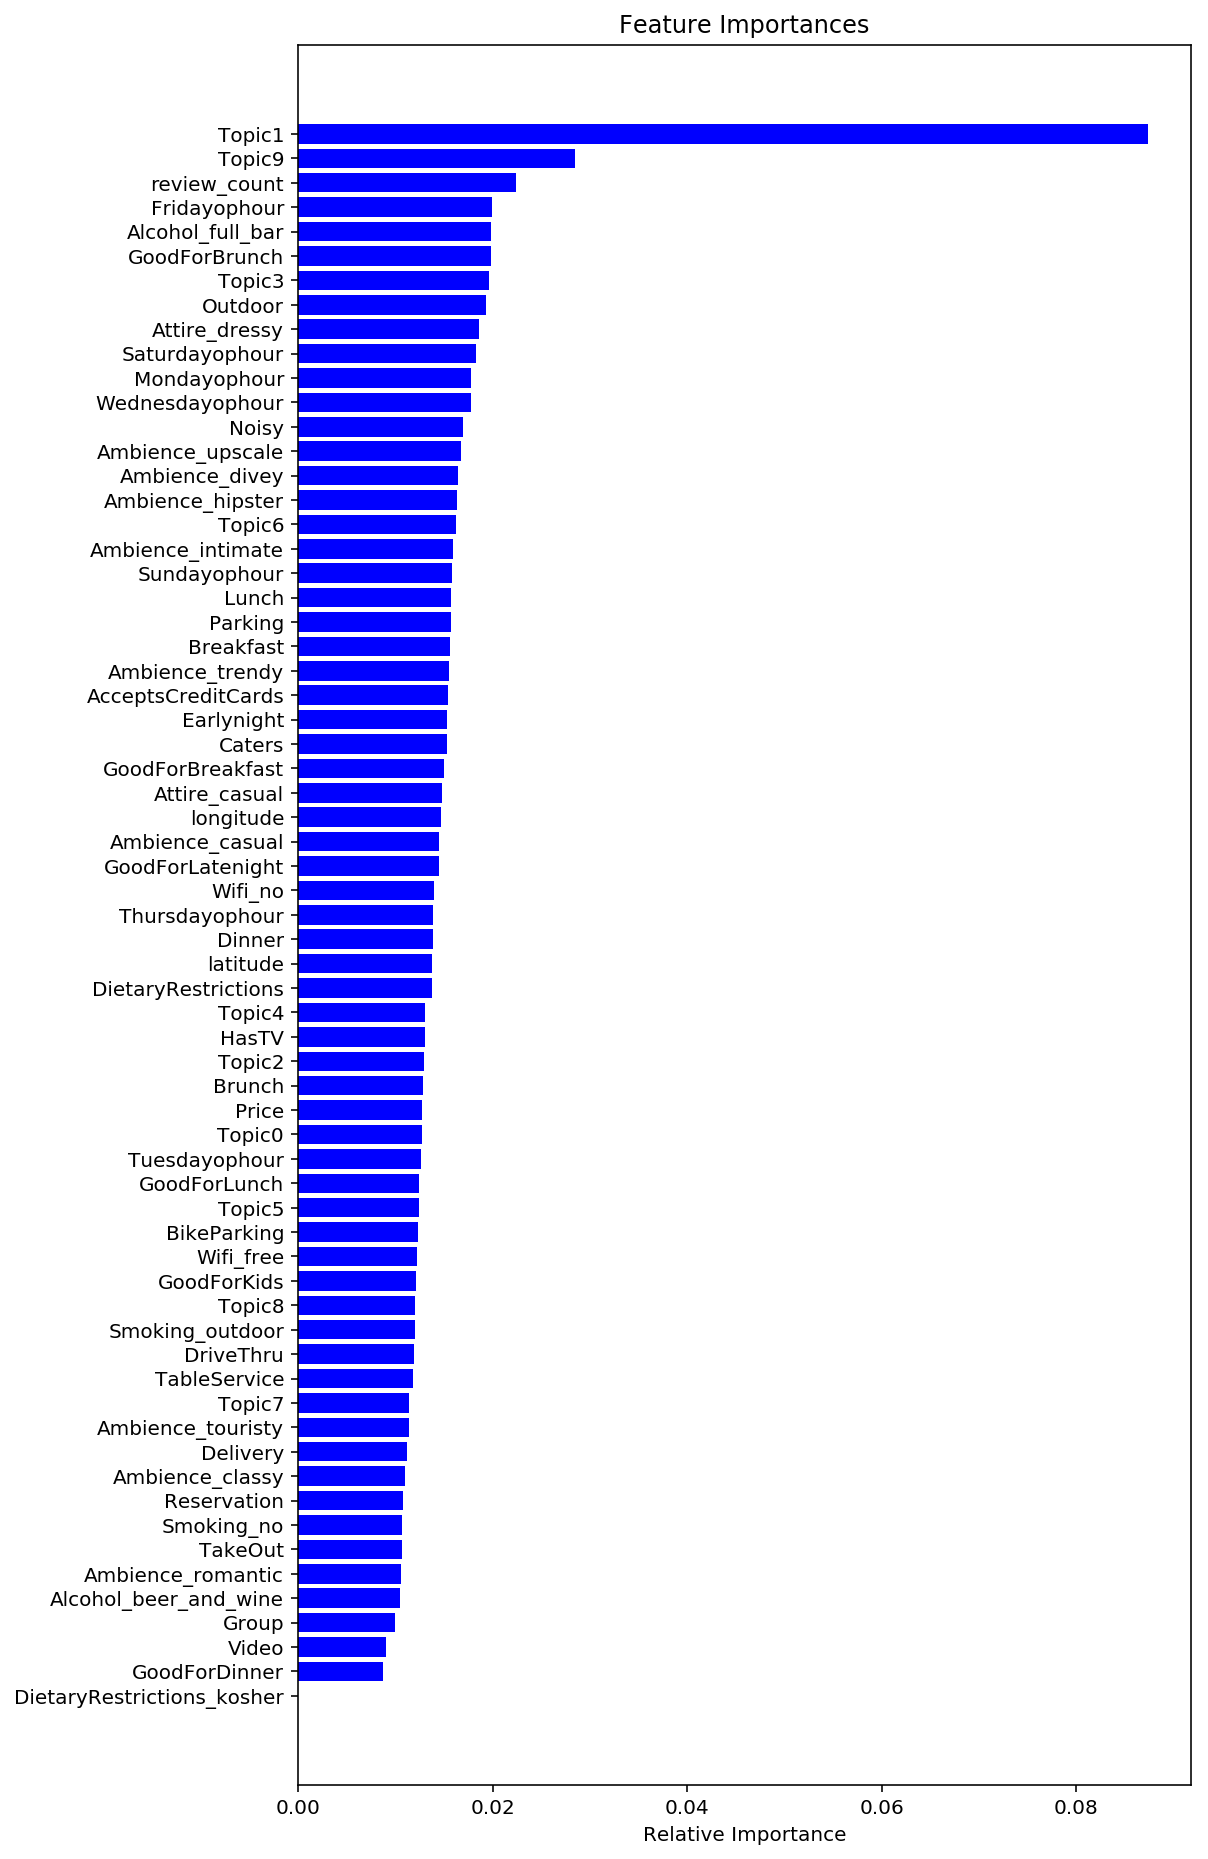

In [15]:
importances = rf.feature_importances_
indices = np.argsort(importances)
indices = indices[:]

plt.figure(figsize=(8,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

names = [
#          "Perceptron",
#          "LogisticRegression",
#          "Linear SVM", 
#          "Decision Tree", 
         "Random Forest", 
#          "RBF SVM",          
         "Neural Net", 
         "XGBoost",
#          "Naive Bayes",  
#          "Nearest Neighbors"
            ] 

classifiers = [ 
#     Perceptron(),
#     LogisticRegression(),
#     LinearSVC(C=1, dual=False),
#     DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=10, n_estimators=200, max_features=10, n_jobs=-1),
#     SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    XGBClassifier(max_depth=10, learning_rate=0.05, n_estimators=500, random_state=100, n_jobs=-1),
#     GaussianNB(),
#     KNeighborsClassifier(3)
                 ]



i = 0
pred = [None, None, None, None, None]
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
#                    ('pca', pca),
                   ('clf', clf)
                     ])
    pipe.fit(X_train, y_train)
    pred[i] = pipe.predict(X_test)
    print(name, pipe.score(X_test, y_test))
    i += 1

Random Forest 0.7818848419281164
Neural Net 0.784890010818608
XGBoost 0.7875946628200505


In [22]:
second_features = pd.DataFrame(pred[:3]).T


In [23]:
new_labels = second_features.mode(axis = 1)

In [24]:
# majority voting
from sklearn.metrics import accuracy_score
accuracy_score(y_test, new_labels[0].values)

0.7892775573987258

In [28]:
# stacking
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

# clf1 = LogisticRegression()
# clf2 = LinearSVC(C=1, dual=False)
clf3 = RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features=0.3, 
                             min_samples_split=10, n_estimators=200, oob_score=False, n_jobs=-1)
clf4 = MLPClassifier(hidden_layer_sizes=(100,50), alpha=1)
clf5 = XGBClassifier(max_depth= 1, eta=0.001, gamma=0, n_estimators=1000, n_jobs=-1, subsample=0.1)
clf0 = RandomForestClassifier(max_depth=10, n_estimators=200, max_features=0.3, n_jobs=-1)


lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf3, clf4, clf5], 
                          meta_classifier=clf0)



for clf, label in zip([clf3, clf4, clf5, sclf], 
                      [
                       'RandomForest',
                       'Neural Net',
                       'XGBoost',
                       'StackingClassifier'
                      ]):

#     scores = model_selection.cross_val_score(clf, X_train, y_train, 
#                                               cv=3, scoring='accuracy')
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    print("Accuracy: %0.4f  [%s]" 
          % (score, label))

Accuracy: 0.7883  [RandomForest]
Accuracy: 0.7833  [Neural Net]
Accuracy: 0.7886  [XGBoost]
Accuracy: 0.7877  [StackingClassifier]


In [44]:
clf.predict(X_test)[:50]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0], dtype=int64)

### Hyper Parameter adjusting -- GridSearch method

In [13]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from xgboost import XGBClassifier


#### LogisticRegression

In [14]:
#logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', LogisticRegression()      ) ] )


params = {'clf__C': [0.01, 0.1, 1, 10, 100, 500, 1000],
          'clf__max_iter' : [100, 200, 500]}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)


Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    6.1s finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])
 
0.7719158144207733
 
0.7729294386344513
 
{'clf__C': 10, 'clf__max_iter': 100}


In [15]:
#logistic regression: Round 2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', LogisticRegression()      ) ] )


params = {'clf__C': list(range(1, 20)),
          'clf__max_iter' : [100, 200]}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)


Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   11.3s finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])
 
0.7719158144207733
 
0.7729294386344513
 
{'clf__C': 3, 'clf__max_iter': 100}


#### Linear SVM

In [16]:
#linear svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', LinearSVC()      ) ] )

params = {'clf__C': [0.01, 0.1, 1, 10, 100],
          'clf__max_iter' : [100, 200, 500]}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    5.0s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   17.6s finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
 
0.7714778845410752
 
0.7717874744560644
 
{'clf__C': 0.1, 'clf__max_iter': 100}


In [17]:
#linear svm： Round 2
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', LinearSVC()      ) ] )

params = {'clf__C': list(np.arange(0.01, 0.25, 0.01)),
          'clf__max_iter' : [100, 200]}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   26.4s finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LinearSVC(C=0.2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
 
0.7721476596512017
 
0.7686620988099531
 
{'clf__C': 0.2, 'clf__max_iter': 100}


#### RandomForest

In [18]:
#random forest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', RandomForestClassifier()      ) ] )
c=range(1,21)

params = {
            'clf__max_depth': [5, 10, 15, 20],
            'clf__n_estimators' : [200, 500], 
            'clf__max_features': ["sqrt", 0.3],
            'clf__oob_score': [True, False],
            'clf__min_samples_split':[2, 10],
            'clf__min_samples_leaf': [1, 10]
         }

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  7.3min finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            m...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
 
0.7854401195290965
 
0.7881956965981488
 
{'clf__max_depth': 15, 'clf__max_features': 0.3, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 200, 'clf__oob_score': False}


In [24]:
#random forest: Round 2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', RandomForestClassifier()      ) ] )
c=range(1,21)

params = {
            'clf__max_depth': list(range(10, 21)),
            'clf__n_estimators' : [200, 500], 
            'clf__max_features': ["sqrt", 0.4, 0.3, 0.2],
            'clf__oob_score': [False],
            'clf__min_samples_split':[5, 10, 15],
            'clf__min_samples_leaf': [1, 2, 5]
         }

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1122 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1672 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 2322 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 3960 out of 3960 | elapsed: 55.4min finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            m...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
 
0.7856719647595249
 
0.7868133189085227
 
{'clf__max_depth': 19, 'clf__max_features': 0.2, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 10, 'clf__n_estimators': 500, 'clf__oob_score': False}


#### Neural Net

In [19]:
#MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', MLPClassifier()      ) ] )

c=[0.01,0.1,1, 10]

params = {'clf__alpha'     : c,
          'clf__hidden_layer_sizes': [(150, 100),(150, 50), (150, 150), 
                                     (100, 100), (100, 50), (50, 50)],
          'clf__batch_size': ["auto", 128, 256]  
}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 11.4min finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', MLPClassifier(activation='relu', alpha=1, batch_size=128, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150), learning_rate='constant',
       learning_rate_init=...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
 
0.7814472294494964
 
0.7821252554393557
 
{'clf__alpha': 1, 'clf__batch_size': 128, 'clf__hidden_layer_sizes': (150, 150)}


In [26]:
#MLPClassifier: Round 2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', MLPClassifier()      ) ] )

c=list(np.arange(0.1, 2, 0.1))

params = {'clf__alpha'     : c,
          'clf__hidden_layer_sizes': [(250, 250),(250, 200), (250, 150), 
                                     (250, 100), (200, 200), (200, 150),
                                     (200, 100), (150, 150), (150, 100)],
          'clf__batch_size': [128]  
}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)

Fitting 5 folds for each of 171 candidates, totalling 855 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed: 48.2min finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', MLPClassifier(activation='relu', alpha=0.8, batch_size=128, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 100), learning_rate='constant',
       learning_rate_ini...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
 
0.782194286303099
 
0.7789397764154345
 
{'clf__alpha': 0.8, 'clf__batch_size': 128, 'clf__hidden_layer_sizes': (150, 100)}


#### XGBoost

In [21]:
# XGBoost
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', XGBClassifier()  ) ] )



params = {'clf__eta'     : [0.01, 0.1, 1],
          'clf__max_depth ': [5, 10, 15, 20],
          'clf__gamma ': [0, 5, 10],
          'clf__subsample ': [0.5, 0.7, 1],
          'clf__n_estimators': [200, 500]
}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  8.8min finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.01, gamma=0, gamma =0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, max_depth =5, min_child_weight=1,
  ...     reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, subsample =0.5))])
 
0.7878616141580154
 
0.7922226229114077
 
{'clf__eta': 0.01, 'clf__gamma ': 0, 'clf__max_depth ': 5, 'clf__n_estimators': 500, 'clf__subsample ': 0.5}


In [27]:
# XGBoost: Round 2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', XGBClassifier()  ) ] )



params = {'clf__eta'     : [0.005, 0.01, 0.015],
          'clf__max_depth ': [2, 5, 10, 15],
          'clf__gamma ': [0, 2, 5],
          'clf__subsample ': [0.3, 0.5, 0.6, 0.8, 1],
          'clf__n_estimators': [500, 1000]
}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1122 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1672 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 29.8min finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.005, gamma=0, gamma =0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, max_depth =2, min_child_weight=1,
 ...     reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, subsample =0.3))])
 
0.7879388959014916
 
0.7930039668229355
 
{'clf__eta': 0.005, 'clf__gamma ': 0, 'clf__max_depth ': 2, 'clf__n_estimators': 1000, 'clf__subsample ': 0.3}


In [28]:
# XGBoost: Round 3
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

pipe = Pipeline( [ ('scl', StandardScaler()), 
#                    ('lda', lda),
                   ('clf', XGBClassifier()  ) ] )



params = {'clf__eta'     : [0.001, 0.003, 0.005, 0.01],
          'clf__max_depth ': [1, 2, 3, 5],
          'clf__gamma ': [0],
          'clf__subsample ': [0.1, 0.2, 0.3, 0.5],
          'clf__n_estimators': [1000, 1500]
}

grid = GridSearchCV(estimator = pipe, 
                    param_grid = params,
                    n_jobs = -1,
                    verbose = 1,
                    cv = 5)

grid.fit(X_train, y_train) 
#grid.score(X_test)

print(grid.best_estimator_)
print(' ')
print(grid.best_score_)
print(' ')
print(grid.score(X_test, y_test))
print(' ')
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 17.9min finished


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.001, gamma=0, gamma =0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, max_depth =1, min_child_weight=1,
 ...     reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, subsample =0.1))])
 
0.7879388959014916
 
0.7930039668229355
 
{'clf__eta': 0.001, 'clf__gamma ': 0, 'clf__max_depth ': 1, 'clf__n_estimators': 1000, 'clf__subsample ': 0.1}


#### Best models after hyper parameter optimization

In [48]:
import numpy as np
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier


In [68]:
# RandomForest

clf1 = RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features=0.3, 
                             min_samples_split=10, n_estimators=200, oob_score=False)

pipe1 = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf1)
                 ])


scores = cross_val_score(pipe1, X_train, y_train, cv=5, n_jobs=-1)

pipe1.fit(X_train, y_train)
score1 = pipe1.score(X_test, y_test)

print("Algo: {0:<20s} and Cross Validation Score: {1:0.4f}".format('RandomForest', np.mean(scores)))
print("Algo: {0:<20s} and Test Set Score: {1:0.4f}".format('RandomForest', score1))


Algo: RandomForestClassifier and Cross Validation Score: 0.7846
Algo: RandomForestClassifier and Test Set Score: 0.7878


In [69]:
# Neural Net

clf2 = MLPClassifier(hidden_layer_sizes=(150,150), alpha=1, batch_size=128)

pipe2 = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf2)
                 ])


scores = cross_val_score(pipe2, X_train, y_train, cv=5, n_jobs=-1)

pipe2.fit(X_train, y_train)
score2 = pipe2.score(X_test, y_test)

print("Algo: {0:<20s} and Cross Validation Score: {1:0.4f}".format('Neural Net', np.mean(scores)))
print("Algo: {0:<20s} and Test Set Score: {1:0.4f}".format('Neural Net', score2))


Algo: Neural Net           and Cross Validation Score: 0.7810
Algo: Neural Net           and Test Set Score: 0.7846


In [81]:
# XGBoost

clf3 = XGBClassifier(max_depth= 1, eta=0.001, gamma=0, n_estimators=1000, n_jobs=-1, subsample=0.1)

pipe3 = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf3)
                 ])


scores = cross_val_score(pipe3, X_train, y_train, cv=5, n_jobs=-1)

pipe3.fit(X_train, y_train)
score3 = pipe3.score(X_test, y_test)

print("Algo: {0:<20s} and Cross Validation Score: {1:0.4f}".format('XGBoost', np.mean(scores)))
print("Algo: {0:<20s} and Test Set Score: {1:0.4f}".format('XGBoost', score3))

Algo: XGBoost              and Cross Validation Score: 0.7822
Algo: XGBoost              and Test Set Score: 0.7887


In [84]:
# bagging
from sklearn.ensemble import BaggingClassifier

clf4 = BaggingClassifier(base_estimator=clf3, n_estimators=5, n_jobs=-1)

pipe4 = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf4)
                 ])


scores = cross_val_score(pipe4, X_train, y_train, cv=5, n_jobs=-1)

pipe4.fit(X_train, y_train)
score4 = pipe4.score(X_test, y_test)

print("Algo: {0:<20s} and Cross Validation Score: {1:0.4f}".format('XGBoost', np.mean(scores)))
print("Algo: {0:<20s} and Test Set Score: {1:0.4f}".format('XGBoost', score4))

Algo: XGBoost              and Cross Validation Score: 0.7831
Algo: XGBoost              and Test Set Score: 0.7886


In [1]:
!pip install xgboost

    100% |████████████████████████████████| 675kB 13.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/jianbowu/Library/Caches/pip/wheels/5d/ea/e9/4aef52d7294badf6bc26728a73d3e001c38e07f7dc3722c5eb
Successfully built xgboost
